In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# warnings 
import warnings 
warnings.filterwarnings('ignore')

data = pd.read_csv(r"C:\Users\hp\Downloads\stress.csv")
print(data.head())

num_rows = data.shape[0]

print(f'The dataset has {num_rows} rows.')

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [4]:
print(data.isnull().sum());

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


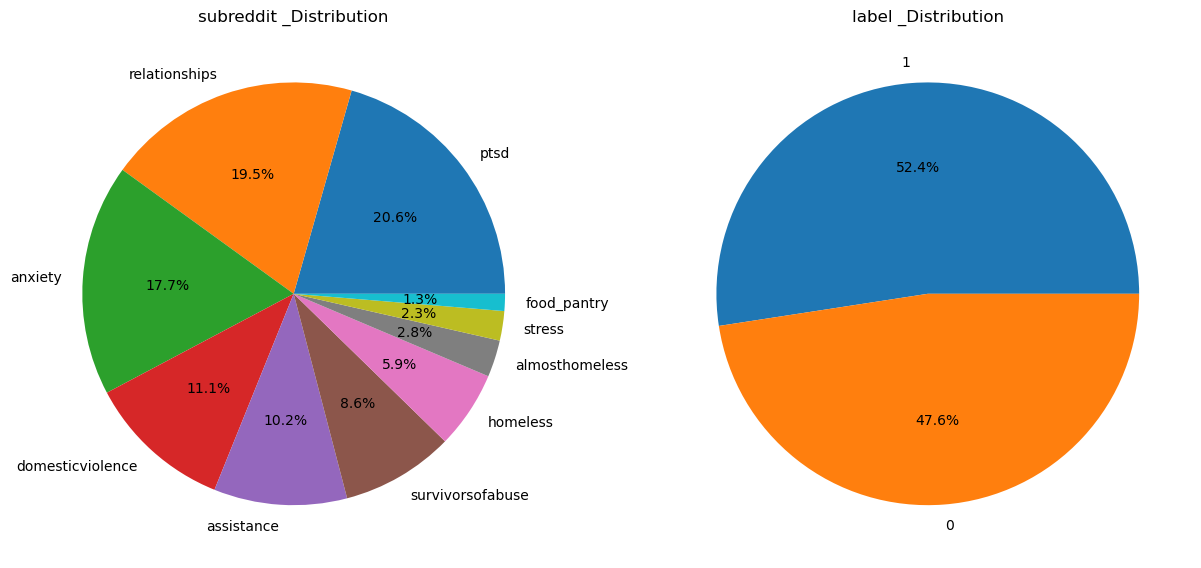

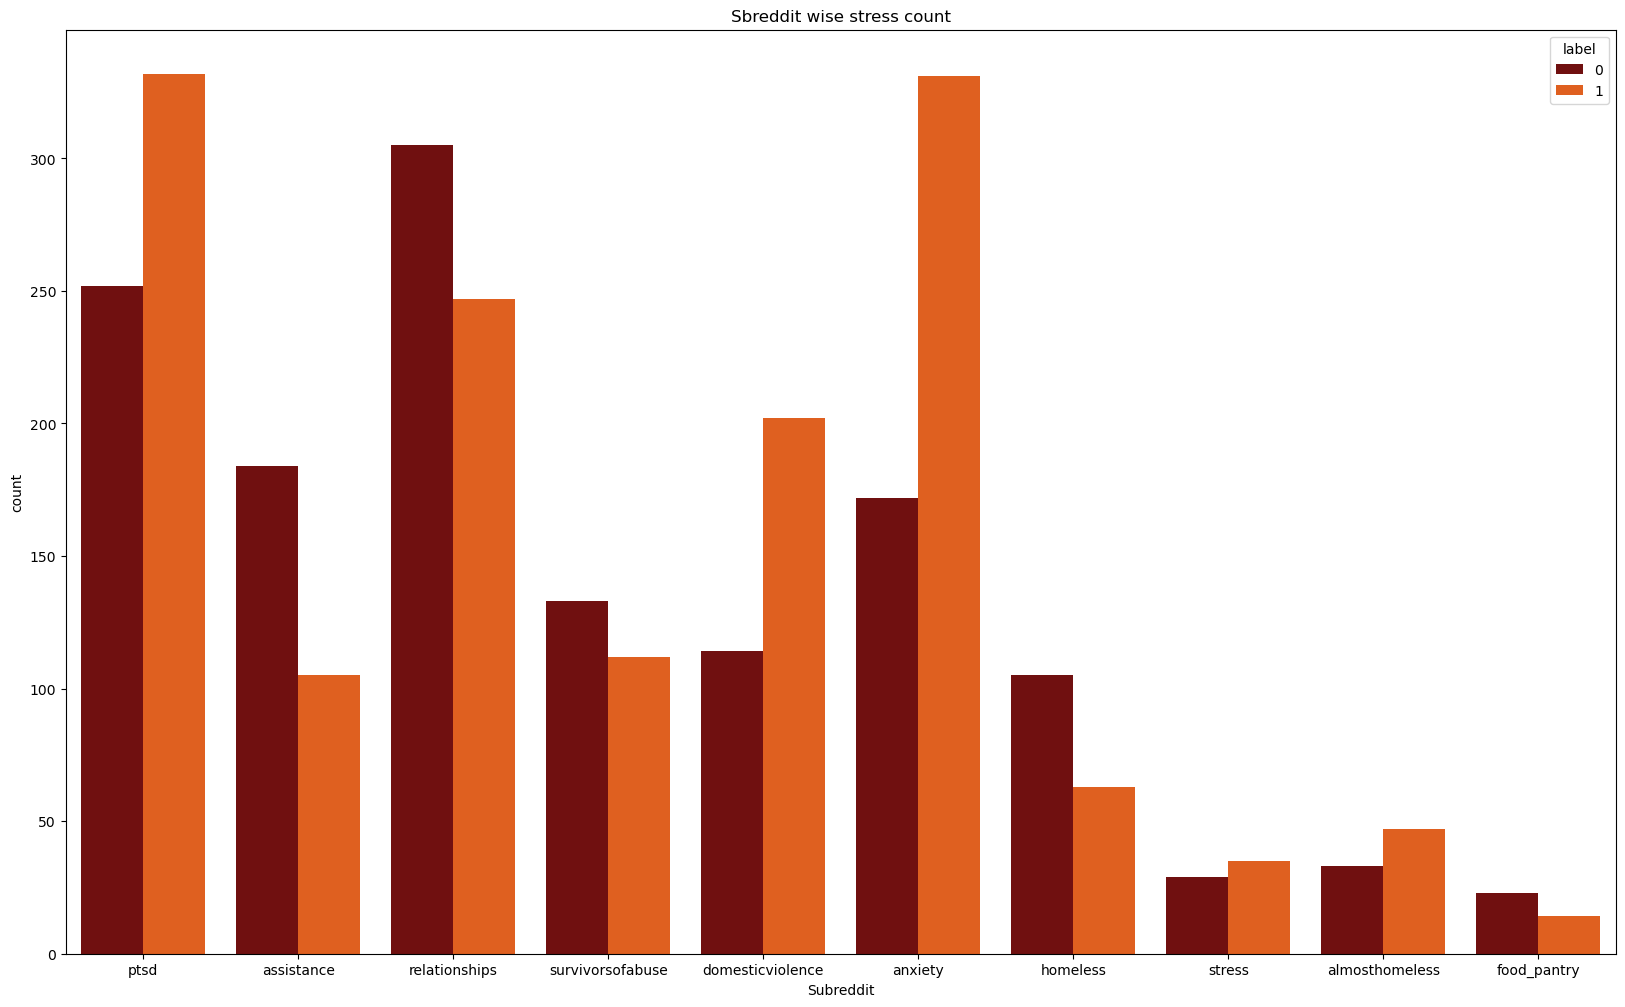

In [5]:
lst = ['subreddit', 'label']
plt.figure(figsize=(15, 12))
for i in range(len(lst)):
    plt.subplot(1, 2, i+1)
    a =data[lst[i]].value_counts()
    lbl = a.index
    plt.title(lst[i] + ' _Distribution')
    plt.pie(x=a, labels=lbl, autopct="%.1f%%")
plt.show()

plt.figure(figsize=(20, 12))
plt.title('Sbreddit wise stress count')
plt.xlabel('Subreddit') 
sns.countplot(data=data, x='subreddit', hue='label', palette='gist_heat')
plt.show()   

In [6]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):   # cleaning the text in text 
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


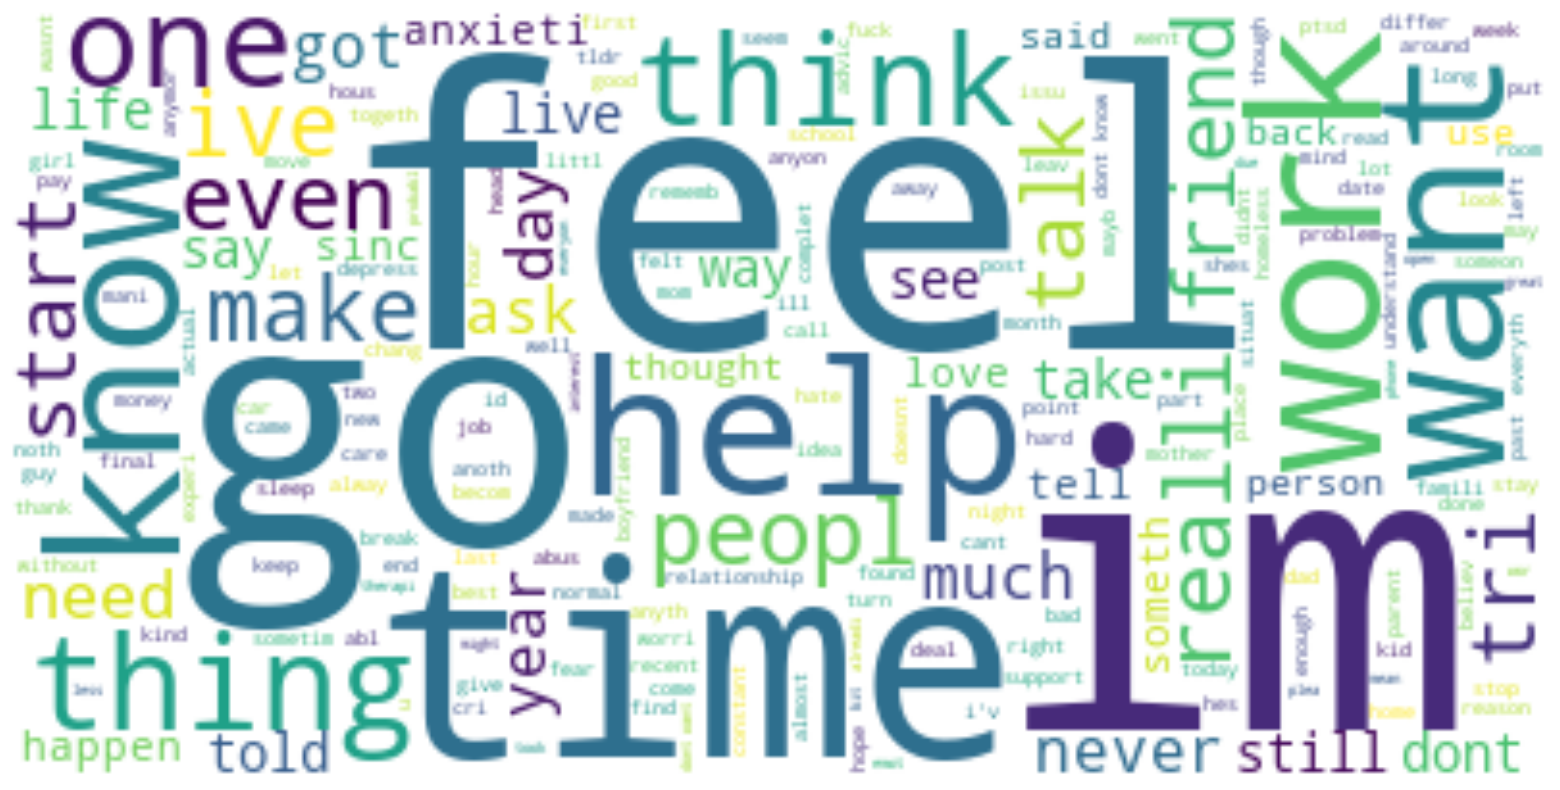

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
data["label"] = data["label"].map({0:"No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [11]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 220.2 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 512.0 kB/s eta 0:00:25
     --------------------------------------- 0.1/12.8 MB 512.0 kB/s eta 0:00:25
     --------------------------------------- 0.1/12.8 MB 512.0 kB/s eta 0:00:25
     --------------------------------------- 0.1/12.8 MB 512.0 kB/s eta 0:00:25
     --------------------------------------- 0.1/12.8 MB 512.0 kB/s eta 0:00:25
     --------------------------------------- 0.1/12.8 MB 512.0 kB/s eta 0:00:25
     --------------------------------------- 0.1/12.8 MB 512.0 kB/s eta 0:00:25
     --------------------------------------- 0.1/12.8 MB 512.0 kB/s eta 0:00:25
      -------------------------------------- 0.2/12.8 MB 389.1 k

In [12]:
# Regular Expression 
import re

# Handling string 
import string 

# NLP tool
import spacy
from spacy.lang.en import English
nlp = spacy.load('en_core_web_sm')

from spacy.lang.en.stop_words import STOP_WORDS

# Importing Natural Language Toolkit for NLP operations
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS 
from nltk.corpus import stopwords
from collections import Counter 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [15]:
import nltk 
import re 
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

# Definig a function for processing 
def preprocess(text,remove_digits=True):
    text = re.sub(r'\w+',' ', text)
    text = re.sub(r'\s+',' ', text)
    text = re.sub(r"(?<!\w)\d+", "", text)
    text = re.sub(r"-(?!\w)|(?<!\w)-", " ", text)
    text = text.lower()
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    nopunc=' '.join([word for word in nopunc.split() 
               if word.lower() not in stopwords.words('english')])
    
    return nopunc
# Defining a function for lemitization 
def lemmatize(words):
    words=nlp(words)
    lemmas = []
    for word in words:
        lemmas.append(word.lemma_)
    return lemmas

# Converting them into string
def listtostring(s):
    str1 = " "
    return (str1.join(s))
def clean_text(input):
    word=preprocess(input)
    lemmas=lemmatize(word)
    return listtostring(lemmas)    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Creating a feature to store clean texts
data['clean_text'] = data['text'].apply(clean_text)
data.head()

,text,label,clean_text
0,said felt way sugget go rest trigger ahead you...,Stress,
1,hey rassist sure right place post goe im curr...,No Stress,
2,mom hit newspap shock would know dont like pla...,Stress,
3,met new boyfriend amaz kind sweet good student...,Stress,
4,octob domest violenc awar month domest violenc...,Stress,


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data['text'])
y = np.array(data['label'])

cv = CountVectorizer()
x = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5, random_state=42)


In [18]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [20]:
# Defining target & features for ML model building 
x=data['clean_text']
y=data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
# Self definition function to convert the data into vector form by tf idf 
# Vectorizer and classify and create model by Logistic regression 

def model_lr_tf(x_train,y_train,x_test,y_test):
    global acc_lr_tf,f1_lr_tf
    # Text to vector transformation
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    ovr = LogisticRegression()
    
    # Fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train,y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf=confusion_matrix(y_test,y_pred)
    acc_lr_tf = accuracy_score(y_test,y_pred)
    f1_lr_tf = f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy :',acc_lr_tf)
    print(10*'===========')
    print('Confusion_Matrix: \n',conf)
    print(10*'===========')
    print('Classification_Report: \n',classification_report(y_test,y_pred))
    
    return y_test,y_pred,acc_lr_tf 

# Self definition function to convert the data into vector form by tf idf
# Vectorizer and classify and create model by Multinomial Naive Bayes

def model_nb_tf(x_train,y_train,x_test,y_test):
    global acc_nb_tf,f1_nb_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    ovr = MultinomialNB()
    
    # Fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train,y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf=confusion_matrix(y_test,y_pred)
    acc_nb_tf = accuracy_score(y_test,y_pred)
    f1_nb_tf = f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy :',acc_nb_tf)
    print(10*'===========')
    print('Confusion_Matrix: \n',conf)
    print(10*'===========')
    print('Classification_Report: \n',classification_report(y_test,y_pred))
    
    return y_test,y_pred,acc_nb_tf

# Self definition function to convert the data into vector form by tf idf
# Vectorizer and classify and create model by Random Forest Classifier

def model_dt_tf(x_train,y_train,x_test,y_test):
    global acc_dt_tf,f1_dt_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    ovr = DecisionTreeClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train,y_train)
    y_pred = ovr.predict(x_test)    
    
    # Model Evaluation
    conf=confusion_matrix(y_test,y_pred)
    acc_dt_tf = accuracy_score(y_test,y_pred)
    f1_dt_tf = f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy :',acc_dt_tf)
    print(10*'===========')
    print('Confusion_Matrix: \n',conf)
    print(10*'===========')
    print('Classification_Report: \n',classification_report(y_test,y_pred))
    
    return y_test,y_pred,acc_dt_tf

# Self definition function to convert the data into vector form by tf idf
# Vectorizer and classify and create model by Random Forest Classifier

def model_knn_tf(x_train,y_train,x_test,y_test):
    global acc_knn_tf,f1_knn_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    ovr = KNeighborsClassifier()
    
    # Fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train,y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf=confusion_matrix(y_test,y_pred)
    acc_knn_tf = accuracy_score(y_test,y_pred)
    f1_knn_tf = f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy :',acc_knn_tf)
    print(10*'===========')
    print('Confusion_Matrix: \n',conf)
    print(10*'===========')
    print('Classification_Report: \n',classification_report(y_test,y_pred))
    
    return y_test,y_pred,acc_knn_tf

# Self definition function to convert the data into vector form by tf idf
# Vectorizer and classify and create model by Random Forest Classifier

def model_rf_tf(x_train,y_train,x_test,y_test):
    global acc_rf_tf,f1_rf_tf
    # Text to vector transformation     
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train) 
    x_test = vector.transform(x_test)
    ovr = RandomForestClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train,y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf=confusion_matrix(y_test,y_pred)
    acc_rf_tf = accuracy_score(y_test,y_pred)
    f1_rf_tf = f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy :',acc_rf_tf)
    print(10*'===========')
    print('Confusion_Matrix: \n',conf)
    print(10*'===========')
    print('Classification_Report: \n',classification_report(y_test,y_pred))
    
    return y_test,y_pred,acc_rf_tf

# Self definition function to convert the data into vector form by tf idf
# Vectorizer and classify and create model by Random Forest Classifier

def model_ada_tf(x_train,y_train,x_test,y_test):
    global acc_ada_tf,f1_ada_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    ovr = AdaBoostClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train,y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf=confusion_matrix(y_test,y_pred)
    acc_ada_tf = accuracy_score(y_test,y_pred)
    f1_ada_tf = f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy :',acc_ada_tf)
    print(10*'===========')
    print('Confusion_Matrix: \n',conf)
    print(10*'===========')
    print('Classification_Report: \n',classification_report(y_test,y_pred))
    

In [22]:
# Evaluating the models

print('*Logistic Regression')
print('\n')
model_lr_tf(x_train,y_train,x_test,y_test)
print('\n')
print(30*'===========')
print('\n')
print('*Multinomial NB')
print('\n')
model_nb_tf(x_train,y_train,x_test,y_test)
print('\n')
print(30*'===========')
print('\n')
print('*Decision Tree')
print('\n')
model_dt_tf(x_train,y_train,x_test,y_test)
print('\n')
print(30*'===========')
print('\n')
print('*KNN')
print('\n')
model_knn_tf(x_train,y_train,x_test,y_test)
print('\n')
print(30*'===========')
print('\n')
print('*Random Forest Bagging')
print('\n')
model_rf_tf(x_train,y_train,x_test,y_test)
print('\n')
print(30*'===========')
print('\n')
print('*Adaptive Boosting')
print('\n')
model_ada_tf(x_train,y_train,x_test,y_test)
print('\n')
print(30*'===========')
print('\n')


*Logistic Regression




ValueError: empty vocabulary; perhaps the documents only contain stop words